In [10]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
!pip install hvplot
import hvplot.pandas
import matplotlib.pyplot as plt
!pip install finta
!pip install yfinance
!pip install YahooFinancials
#!pip install fdpf
!pip install MCSimulation
from MCForecastTools import MCSimulation
import yfinance as yf
from finta import TA

%matplotlib inline
#streamlit or tableau of 


ERROR: Could not find a version that satisfies the requirement MCSimulation (from versions: none)
ERROR: No matching distribution found for MCSimulation


ModuleNotFoundError: No module named 'MCForecastTools'

In [13]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [14]:
def read_data(data, start, end):
    data1_df = yf.download(data, start, end)
    #data1_df.dropna(inplace = True)
    dataclose1_df = data1_df
    return dataclose1_df

In [15]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    #data_df.dropna(inplace = True)
    dataclose_df = data_df["Adj Close"]
    return dataclose_df

In [16]:
shareport = read_data(['360.AX', 'ANZ.AX', 'SQ2.AX', 'CBA.AX', 'PXA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'COL.AX', 'WES.AX', 'CSL.AX', 'GOLD.AX', 'RMD.AX', 'TLS.AX', 'IAG.AX', 'VCX.AX', 'ANN.AX', 'JLG.AX', 'XRO.AX'],"2018-01-01","2022-07-28")

[*********************100%***********************]  22 of 22 completed


In [17]:
shareport.dropna(inplace = True)
shareport.head()

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,GOLD.AX,IAG.AX,JLG.AX,PXA.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,WES.AX,XRO.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,8.53,30.338259,16.821274,33.182640,27.817116,9.636588,45.933334,10.024984,96.875481,17.272688,...,236.800003,4.354177,8.367599,19.129999,33.267685,176.630005,4.129041,1.628580,53.435520,117.400002
2022-01-21,8.11,29.627901,16.458368,32.570526,27.359663,9.402264,43.723255,9.896964,95.657295,17.164610,...,238.320007,4.304810,8.367599,18.650000,32.699265,172.500000,4.069344,1.589573,52.225105,117.309998
2022-01-24,7.39,29.400978,16.517218,32.679123,27.028738,9.343682,43.627579,9.887115,95.726067,17.370939,...,238.490005,4.324557,8.238102,18.780001,32.639427,166.250000,4.029546,1.628580,52.156219,116.250000
2022-01-25,7.62,28.621557,16.291626,31.741205,26.055431,9.216757,43.082233,9.631075,93.771065,16.290169,...,240.529999,4.215950,7.969143,18.400000,32.569618,159.250000,3.910152,1.570069,51.713383,112.190002
2022-01-27,7.10,28.720219,16.026802,30.823029,26.347422,9.372973,43.694550,9.483359,92.130440,15.877510,...,238.800003,4.215950,7.471071,17.950001,31.313107,150.729996,3.860404,1.545689,49.804268,104.690002


In [18]:
sharereturns_df = shareport.pct_change().copy() 
sharereturns_df.tail(30)

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,GOLD.AX,IAG.AX,JLG.AX,PXA.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,WES.AX,XRO.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-16,0.000000,-0.008115,-0.011494,-0.021719,-0.004167,-0.013135,0.002506,-0.014045,-0.001655,0.023563,...,0.000000,-0.020930,0.026316,-0.044776,-0.005860,0.014905,0.013055,0.014706,-0.001438,0.003092
2022-06-17,-0.041985,-0.015454,-0.023837,-0.013414,-0.016272,-0.000887,-0.033856,-0.018044,-0.035481,-0.005525,...,0.000000,-0.016627,-0.007890,-0.047697,-0.009362,-0.077869,-0.020619,0.008696,-0.012002,-0.055620
2022-06-20,0.035857,-0.014774,0.005956,-0.002344,0.010870,-0.008881,-0.053152,0.014507,0.003323,0.027778,...,0.024927,0.016908,-0.009940,0.000000,0.016801,0.041111,0.002632,0.063218,0.030126,0.029924
2022-06-21,0.038462,0.033427,0.004737,-0.004699,0.026181,-0.040323,0.017139,0.009533,0.024215,0.005405,...,-0.005270,0.026128,0.002008,0.036269,0.003442,0.019803,0.002625,0.016216,0.012028,-0.002773
2022-06-22,-0.044444,0.038089,0.001179,0.014636,-0.005467,0.042017,0.001954,-0.012276,-0.001115,-0.029570,...,0.000000,-0.009259,0.004008,-0.004167,-0.003431,-0.014186,0.000000,-0.023936,-0.006525,-0.006754
2022-06-23,-0.065891,-0.008736,0.008240,-0.000465,0.010994,0.024194,-0.012917,0.018164,0.002010,0.020314,...,0.006927,0.028037,0.057884,0.020084,0.020654,0.047299,0.002618,0.002725,0.009383,0.018933
2022-06-24,0.248963,-0.026146,0.012843,0.016294,-0.007250,0.006124,-0.011852,0.021596,0.004568,0.027149,...,-0.006070,-0.009091,0.058491,0.080394,0.026981,0.109359,0.015666,0.010870,0.018127,0.074980
2022-06-27,0.026578,0.027451,0.026513,0.048557,0.030123,0.003478,0.029485,0.000000,0.039707,0.014978,...,0.003257,0.009174,0.042781,0.037965,0.011166,0.054822,0.010283,-0.002688,0.007761,0.011929
2022-06-28,-0.032362,0.020258,0.006176,0.000437,-0.006646,0.025997,0.043204,0.003676,-0.002134,0.016493,...,-0.006088,-0.009091,0.008547,0.019751,-0.001299,-0.031761,0.000000,0.035040,-0.022877,-0.006736


In [19]:
shareport_std = sharereturns_df.std() 
shareport_std

360.AX     0.069769
ALD.AX     0.017287
AMC.AX     0.014013
ANN.AX     0.020963
ANZ.AX     0.013738
APA.AX     0.014709
BHP.AX     0.023484
BXB.AX     0.019024
CBA.AX     0.014034
CHC.AX     0.021313
COL.AX     0.012185
CSL.AX     0.016385
GOLD.AX    0.079937
IAG.AX     0.015656
JLG.AX     0.030771
PXA.AX     0.024983
RMD.AX     0.018324
SQ2.AX     0.063670
TLS.AX     0.011299
VCX.AX     0.019639
WES.AX     0.016454
XRO.AX     0.033386
dtype: float64

In [20]:
ma_short = shareport.rolling(12).mean()
ma_long = shareport.rolling(28).mean()

In [21]:
# Compute signal for all stocks
signal = ma_short > ma_long

# Change signal type to integer
signal = signal.astype(int)

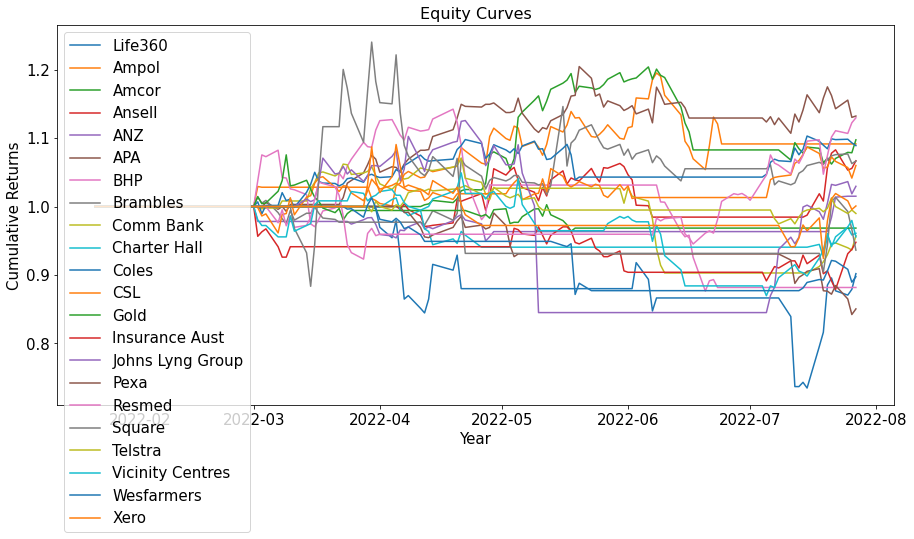

In [22]:

strategy_returns = signal.shift(1) * shareport.pct_change()

# Set the figure size
plt.figure(figsize=(15, 7))

# Plot the cumulative returns for all stocks
plt.plot((strategy_returns+1).cumprod())

# Set the title
plt.title('Equity Curves', fontsize=16)

# Set the labels
plt.ylabel('Cumulative Returns', fontsize=15)
plt.xlabel('Year', fontsize=15)

# Set the tick size
plt.tick_params(labelsize=15)

# Set the legend
plt.legend(['Life360', 'Ampol', 'Amcor', 'Ansell', 'ANZ', 'APA', 'BHP', 'Brambles', 'Comm Bank', 'Charter Hall', 'Coles', 'CSL', 'Gold', 'Insurance Aust', 'Johns Lyng Group','Pexa', 'Resmed', 'Square', 'Telstra', 'Vicinity Centres', 'Wesfarmers', 'Xero'],
           loc='upper left', prop={'size': 15})

# Show the graph
plt.show()

In [23]:
# Set weights - it is not as simple as just taking up a portfolio of equal weighted holdings, this is part of the Qualitative and Quantitative Research - to structure portfolio for best outcomes 
weights = [0.0331, 0.0331, .0591, 0.0276, 0.0539, 0.0265, 0.0713, 0.0342, 0.0692, 0.0585, 0.0394, 0.0394, .0515, 0.0651, 0.0255, 0.046, 0.0276, 0.0381, 0.0397, 0.0331, 0.0276, 0.15]

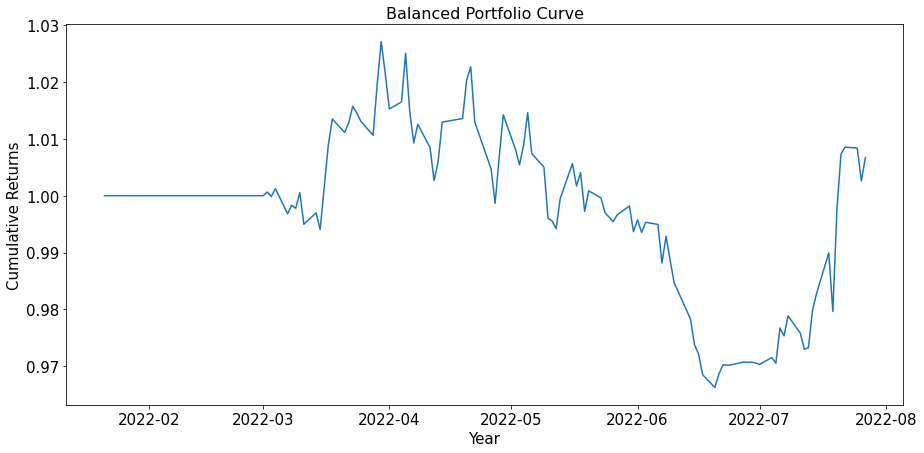

In [24]:
# Set the figure size
plt.figure(figsize=(15, 7))

# Plot the equal-weighted portfolio
plt.plot((strategy_returns.mean(axis=1)+1).cumprod())

# Set the title
plt.title('Balanced Portfolio Curve', fontsize=16)

# Set the labels
plt.ylabel('Cumulative Returns', fontsize=15)
plt.xlabel('Year', fontsize=15)

# Set the tick size
plt.tick_params(labelsize=15)

# Show the graph
plt.show()

In [25]:
#Calculate total number of days of data 
days = len(shareport)

# Compute the portfolio CAGR
cagr = ((strategy_returns.mean(axis=1)+1).cumprod().iloc[-1]**(252/days)-1)*100

# Print the CAGR
print(f'CAGR is {cagr:.2f}%')

CAGR is 1.30%


In [26]:
shareport['weighted'] = shareport.dot(weights) 
shareport

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,IAG.AX,JLG.AX,PXA.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,WES.AX,XRO.AX,weighted
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,8.53,30.338259,16.821274,33.182640,27.817116,9.636588,45.933334,10.024984,96.875481,17.272688,...,4.354177,8.367599,19.129999,33.267685,176.630005,4.129041,1.628580,53.435520,117.400002,68.065147
2022-01-21,8.11,29.627901,16.458368,32.570526,27.359663,9.402264,43.723255,9.896964,95.657295,17.164610,...,4.304810,8.367599,18.650000,32.699265,172.500000,4.069344,1.589573,52.225105,117.309998,67.264661
2022-01-24,7.39,29.400978,16.517218,32.679123,27.028738,9.343682,43.627579,9.887115,95.726067,17.370939,...,4.324557,8.238102,18.780001,32.639427,166.250000,4.029546,1.628580,52.156219,116.250000,66.772766
2022-01-25,7.62,28.621557,16.291626,31.741205,26.055431,9.216757,43.082233,9.631075,93.771065,16.290169,...,4.215950,7.969143,18.400000,32.569618,159.250000,3.910152,1.570069,51.713383,112.190002,65.421678
2022-01-27,7.10,28.720219,16.026802,30.823029,26.347422,9.372973,43.694550,9.483359,92.130440,15.877510,...,4.215950,7.471071,17.950001,31.313107,150.729996,3.860404,1.545689,49.804268,104.690002,63.256448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,4.29,32.970001,17.969999,26.209999,21.930000,12.000000,36.790001,11.450000,97.620003,11.640000,...,4.270000,7.500000,13.800000,33.290001,107.029999,4.010000,1.970000,47.590000,90.500000,49.731747
2022-07-22,4.20,32.570000,18.110001,26.330000,22.590000,11.800000,36.750000,11.470000,97.800003,11.670000,...,4.210000,7.490000,14.000000,33.570000,107.709999,3.960000,2.000000,47.529999,91.220001,49.860957
2022-07-25,4.17,32.349998,18.260000,25.610001,22.620001,11.930000,37.349998,11.480000,97.070000,11.950000,...,4.460000,7.530000,13.690000,33.450001,105.500000,3.920000,2.030000,46.919998,90.260002,49.517525


In [33]:

risk_free_rate = 0.02/252

# Compute the portfolio Sharpe ratio
sharpe = np.sqrt(252)*(np.mean(strategy_returns.mean(axis=1)) -
                       risk_free_rate)/np.std(strategy_returns.mean(axis=1))

# Print the Sharpe ratio
print(f'Sharpe ratio is {sharpe:.2f}')

Sharpe ratio is -0.06


In [34]:
def drawdown_cal(cumulative_returns_series):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(cumulative_returns_series.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the drawdown in percentage
    drawdown = ((cumulative_returns_series)/running_max - 1) * 100

    # Return the maximum drawdown and the drawdown series
    return drawdown.min(), drawdown

# Use the function compute the drawdown and its maximum value
mdd, drawdown = drawdown_cal((strategy_returns.mean(axis=1)+1).cumprod())

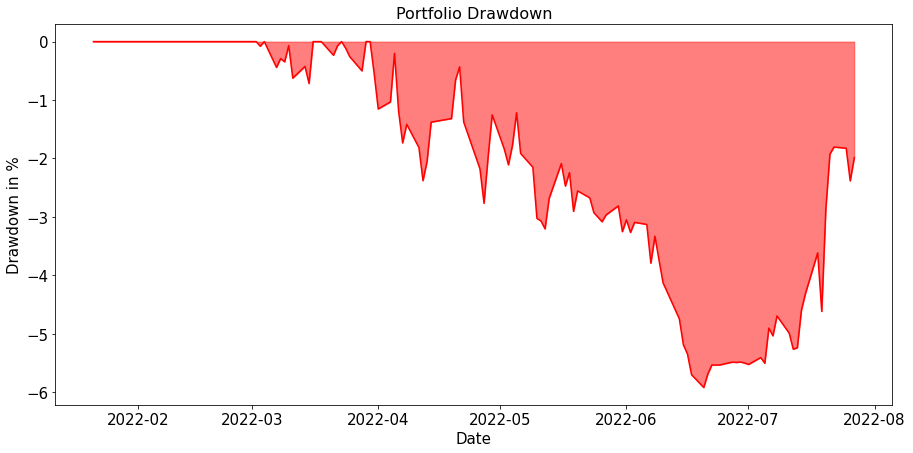

In [35]:
# Set the figure size
plt.figure(figsize=(15, 7))

# Plot the portfolio drawdown series
plt.plot(drawdown, color='r')

# Set the title
plt.title('Portfolio Drawdown', fontsize=16)

# Set the labels
plt.ylabel('Drawdown in %', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Set the tick size
plt.tick_params(labelsize=15)

# Fill the space between 0 and the drawdown with red color
plt.fill_between(strategy_returns.index, drawdown, alpha=0.5, color='r')

# Show the graph
plt.show()

In [36]:
# Print the maximum drawdown
print(f'Maximum Drawdown is {mdd:.2f}%')

Maximum Drawdown is -5.92%


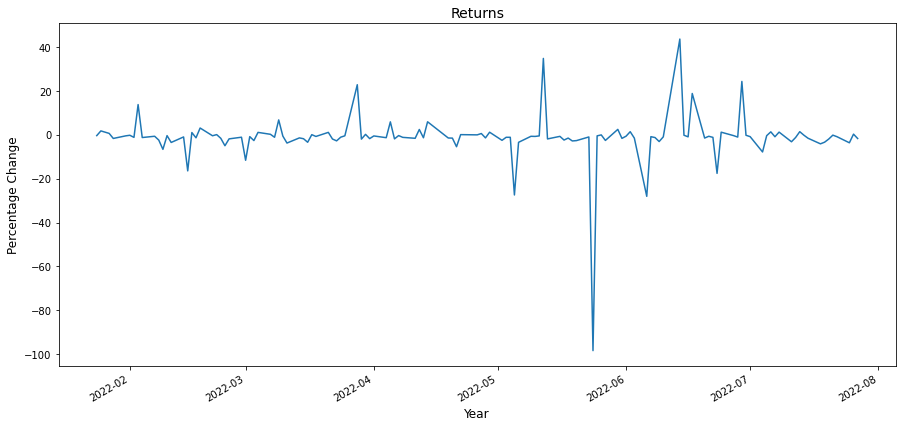

In [37]:
# Calculate the percentage change
shareport['weighted'] = shareport['weighted'].pct_change()

# Plot the percentage change
plt.figure(figsize=(15,7))
shareport['weighted'].plot()

# Set the title and axes label
plt.title('Returns', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)

# Show the plot
plt.show()

In [38]:
algoport = read_data(['ANZ.AX', 'AMC.AX', 'BHP.AX', 'WES.AX', 'CSL.AX', 'GOLD.AX'],"2008-01-01","2022-07-25")

[*********************100%***********************]  6 of 6 completed


In [39]:
algoport.dropna(inplace = True)
algoport.head()

,AMC.AX,ANZ.AX,BHP.AX,CSL.AX,GOLD.AX,WES.AX
Date,,,,,,
2008-01-02,2.686118,12.384184,19.283707,28.839653,95.220001,11.422430
2008-01-03,2.670546,12.276375,19.188007,28.784447,97.010002,11.478498
2008-01-04,2.654974,12.312307,19.546883,27.987946,97.779999,11.428039
2008-01-07,2.623832,11.988895,19.149725,27.207216,99.370003,11.215007
2008-01-08,2.682226,12.015845,18.661648,27.869658,97.620003,11.206597


In [40]:
algocsl = algoport.drop(['AMC.AX', 'ANZ.AX', 'BHP.AX', 'GOLD.AX', 'WES.AX'], axis = 1)
algocsl

,CSL.AX
Date,
2008-01-02,28.839653
2008-01-03,28.784447
2008-01-04,27.987946
2008-01-07,27.207216
2008-01-08,27.869658
...,...
2022-07-18,296.660004
2022-07-19,290.660004
2022-07-20,291.230011


In [41]:
# Set 10 as the lookback period of the short-term moving average
shortterm_lookback = 9

# Set 24 as the lookback period of the long-term moving average
longterm_lookback = 21

# Store short-term moving average values in the column 'ma_short'
algocsl['ma_short'] = algocsl['CSL.AX'].rolling(shortterm_lookback).mean()

# Store long-term moving average values in the column 'ma_long'
algocsl['ma_long'] = algocsl['CSL.AX'].rolling(longterm_lookback).mean()

algocsl.tail()

,CSL.AX,ma_short,ma_long
Date,,,
2022-07-18,296.660004,291.897780,279.022382
2022-07-19,290.660004,292.401113,280.338097
2022-07-20,291.230011,292.871114,281.825240
2022-07-21,295.239990,293.747779,283.419525
2022-07-22,293.470001,294.356669,284.656192


In [42]:
# Create a column 'signal' to store the relative position of moving averages
algocsl['signal'] = np.where(algocsl.ma_short > algocsl.ma_long, 1, 0)
algocsl

,CSL.AX,ma_short,ma_long,signal
Date,,,,
2008-01-02,28.839653,NaN,NaN,0
2008-01-03,28.784447,NaN,NaN,0
2008-01-04,27.987946,NaN,NaN,0
2008-01-07,27.207216,NaN,NaN,0
2008-01-08,27.869658,NaN,NaN,0
...,...,...,...,...
2022-07-18,296.660004,291.897780,279.022382,1
2022-07-19,290.660004,292.401113,280.338097,1
2022-07-20,291.230011,292.871114,281.825240,1


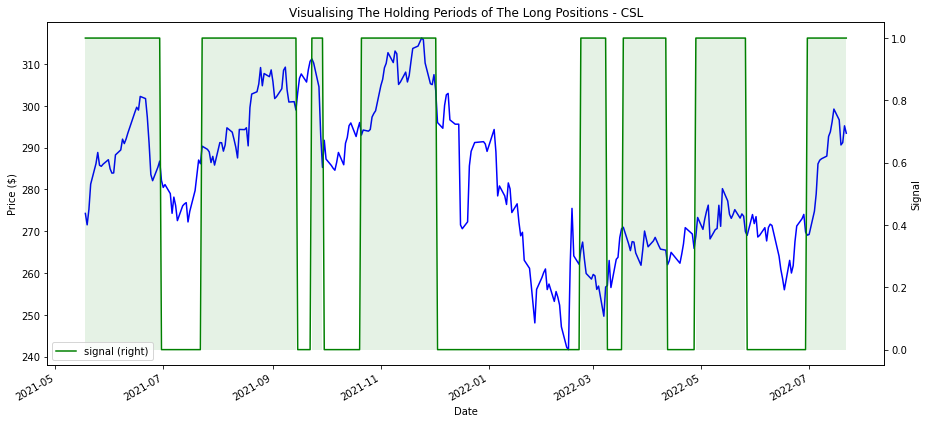

In [43]:
days = 300

# Plot the close prices of the last 300 days
close_plot = algocsl['CSL.AX'][-days:].plot(figsize=(15, 7), color='blue')

# Plot the signal of the last 100 days
signal_plot = algocsl.signal[-days:].plot(figsize=(15, 7),
                                       secondary_y=True, ax=close_plot, style='green')

# Highlight the holding periods of the long positions
plt.fill_between(algocsl['CSL.AX'][-days:].index, 0, 1,
                 where=(algocsl.signal[-days:] > 0), color='green', alpha=0.1, lw=0)

# Title of the plot
signal_plot.set_title('Visualising The Holding Periods of The Long Positions - CSL')

# Plot ylabels
close_plot.set_ylabel('Price ($)')
signal_plot.set_ylabel('Signal')

# Legend of the plot
plt.legend()

# Show the plot
plt.show()

In [44]:
# Calculate strategy returns
strategy_returns = algoport.signal.shift(1)*algoport['CSL.AX'].pct_change()

# Total strategy returns
print(f'Total strategy returns: {strategy_returns.sum():.2f} %')

AttributeError: 'DataFrame' object has no attribute 'signal'

In [45]:
# Create a column 'long_cross_over' to store the long crossover conditions
algocsl['long_cross_over'] = np.where((algocsl['ma_short'].shift(
    1) < algocsl['ma_long'].shift(1)) & (algocsl['ma_short'] >= algocsl['ma_long']), True, False)
algocsl.tail(50)

,CSL.AX,ma_short,ma_long,signal,long_cross_over
Date,,,,,
2022-05-13,280.200012,273.408888,269.670000,1,False
2022-05-16,277.250000,273.895555,270.397619,1,False
2022-05-17,274.070007,273.820001,270.926668,1,False
2022-05-18,273.089996,273.468889,271.314286,1,False
2022-05-19,274.000000,274.117778,271.869048,1,False
2022-05-20,275.170013,274.647780,272.377143,1,False
2022-05-23,273.149994,274.925557,272.670952,1,False
2022-05-24,274.149994,274.695557,272.827619,1,False
2022-05-25,273.600006,274.964447,273.030477,1,False


In [46]:
# Create a column 'exit_cross_over' to store the long exit conditions
algocsl['exit_cross_over'] = np.where((algocsl['ma_short'].shift(
    1) > algocsl['ma_long'].shift(1)) & (algocsl['ma_short'] <= algocsl['ma_long']), True, False)
algocsl.tail(50)

,CSL.AX,ma_short,ma_long,signal,long_cross_over,exit_cross_over
Date,,,,,,
2022-05-13,280.200012,273.408888,269.670000,1,False,False
2022-05-16,277.250000,273.895555,270.397619,1,False,False
2022-05-17,274.070007,273.820001,270.926668,1,False,False
2022-05-18,273.089996,273.468889,271.314286,1,False,False
2022-05-19,274.000000,274.117778,271.869048,1,False,False
2022-05-20,275.170013,274.647780,272.377143,1,False,False
2022-05-23,273.149994,274.925557,272.670952,1,False,False
2022-05-24,274.149994,274.695557,272.827619,1,False,False
2022-05-25,273.600006,274.964447,273.030477,1,False,False


In [47]:
def backtest_trade_sheet(algocsl, long_crossover_column, exit_crossover_column):
    


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_21588/3639291255.py, line 2)

In [48]:
# Create a dataframe 'trade_sheet' to store the trades
trade_sheet = pd.DataFrame()


In [49]:
# Initialise the current_position as '0'
current_position = 0

In [50]:
# Define a variable to store the long entry date
entry_date = ''

# Define a variable to store the long entry price
entry_price = ''

# Define a variable to store the long exit date
exit_date = ''

# Define a variable to store the long exit price
exit_price = ''

In [51]:
# Iterate over the dates in the dataframe 'data'
for current_date in algocsl.index:
    # Define the variable 'long_crossover' that stores the long crossover condition on the current_date
    long_crossover = algocsl.loc[current_date, 'long_cross_over']

    # Define the variable 'exit_crossover' that stores the exit crossover condition on date current_date
    exit_crossover = algocsl.loc[current_date, 'exit_cross_over']

    # We will enter the long position if we are not holding any position and the entry condition is met
    if current_position == 0 and long_crossover == True:

        # Define the variable 'entry_date'
        entry_date = current_date

        # Extract the 'Close price' of the current_date and store it the variable 'entry price'
        entry_price = algocsl.loc[entry_date, 'CSL.AX']

        # Long position is opened so update the current_position to '1'
        current_position = 1

    # We will exit the long position if we are holding a long position and the exit condition is met
    elif current_position == 1 and exit_crossover == True:

        # Define the variable 'exit_date'
        exit_date = current_date

        # Extract the 'Close price' on the current_date and store in the variable 'exit price'
        exit_price = algocsl.loc[exit_date, 'CSL.AX']

        # Append the details of this trade to the 'trade_sheet' dataframe
        trade_sheet = trade_sheet.append(
            [(current_position, entry_date, entry_price, exit_date, exit_price)], ignore_index=True)

        # Long position is closed so update the current_position to '0'
        current_position = 0

# Define the names of columns in 'trade_sheet' dataframe
trade_sheet.columns = ['Position', 'Entry Date',
                       'Entry Price', 'Exit Date', 'Exit Price']

trade_sheet.tail(50)

,Position,Entry Date,Entry Price,Exit Date,Exit Price
44,1,2014-09-29,66.534225,2014-10-13,65.211502
45,1,2014-10-23,67.856918,2014-11-25,72.024384
46,1,2014-11-28,74.805687,2015-01-14,77.750084
47,1,2015-02-02,79.815697,2015-02-20,81.265244
48,1,2015-02-24,82.651360,2015-04-07,85.484680
49,1,2015-04-10,86.863770,2015-04-29,83.110107
50,1,2015-05-27,84.406990,2015-06-12,81.557503
51,1,2015-07-10,80.425018,2015-08-17,85.731270
52,1,2015-09-17,83.440453,2015-09-22,83.329765
53,1,2015-09-28,83.726425,2015-09-30,82.287315


In [52]:
# Save the trades generated in the dataframe 'crossover_trade_sheet'
crossover_trade_sheet = backtest_trade_sheet(
    algocsl, 'Close', 'long_cross_over', 'exit_cross_over')

# Calculate PnL for each trade
crossover_trade_sheet['PnL'] = (crossover_trade_sheet['Exit Price'] -
                                crossover_trade_sheet['Entry Price']) * crossover_trade_sheet['Position']

# Print the total profit/loss by summing up the PnL of each trade.
print(f'The total PnL of trades generated between 2010-01-01 and 2022-05-31 is $',
      round(crossover_trade_sheet.PnL.sum(), 2))

# Print the last 5 rows of the 'crossover_trade_sheet' dataframe
crossover_trade_sheet.tail()

NameError: name 'backtest_trade_sheet' is not defined

In [53]:
# Define a variable to store the stop loss percentage
stop_loss_percentage = 0.09

# Define a variable to store the take profit percentage
take_profit_percentage = 0.14
    # Step-5: We will enter the long position if we are not holding any position and entry condition is met
    if current_position == 0 and long_crossover == True:

        # Define the variable 'entry_date'
        entry_date = current_date

        # Extract the 'Close price' on the current_date and store in the variable 'entry price'
        entry_price = data.loc[entry_date, 'Close']

        # Since a new long position is opened, change the state of current_position to '1'
        current_position = 1

    # Step-6: We will exit the long position if we are holding long position and exit condition is met
    elif current_position == 1 and exit_crossover == True:

        # Define the variable 'exit_date'
        exit_date = current_date

        # Extract the 'Close price' on the current_date and store in the variable 'exit price'
        exit_price = data.loc[exit_date, 'Close']        

        # Exit type is 'exit_crossover'
        exit_type = 'exit_crossover'

        # Append the details of this trade to the 'trade_sheet' dataframe
        trade_sheet = trade_sheet.append(
            [(current_position, entry_date, entry_price, exit_date, exit_price, exit_type)], ignore_index=True)

        # Since a new long position is closed, change the state of current_position to '0'
        current_position = 0

# Define the names of columns in 'trade_sheet' dataframe
trade_sheet.columns = ['Position', 'Entry Date',
                  'Entry Price', 'Exit Date', 'Exit Price', 'Exit Type']

trade_sheet.tail()

IndentationError: unexpected indent (Temp/ipykernel_21588/2877271117.py, line 7)